# Processing TESS sector 4 data for TOI4504

In [1]:
%matplotlib inline
from process_TESS_data.process_flux_data import *
path = '../research/star_systems/TOI-4504/lightkurve/'

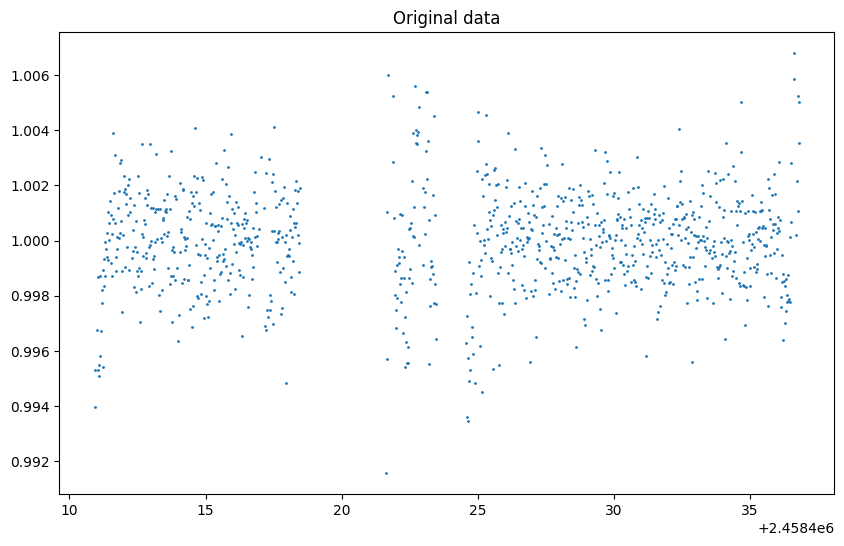

,time,flux,flux_err
0,2.458411e+06,0.995306,NaN
1,2.458411e+06,0.993961,NaN
2,2.458411e+06,0.996759,NaN
3,2.458411e+06,0.998667,NaN
4,2.458411e+06,0.995303,NaN
...,...,...,...
988,2.458437e+06,1.002153,NaN
989,2.458437e+06,1.005238,NaN
990,2.458437e+06,1.001081,NaN
991,2.458437e+06,1.003519,NaN


In [2]:
full_path = path+"4/4_TGLC_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

In [3]:
df = calculate_flux_err(df, window_length=101)
df

,time,flux,flux_err
0,2.458411e+06,0.995306,0.002276
1,2.458411e+06,0.993961,0.002254
2,2.458411e+06,0.996759,0.002259
3,2.458411e+06,0.998667,0.002259
4,2.458411e+06,0.995303,0.002252
...,...,...,...
988,2.458437e+06,1.002153,0.002256
989,2.458437e+06,1.005238,0.002277
990,2.458437e+06,1.001081,0.002298
991,2.458437e+06,1.003519,0.002320


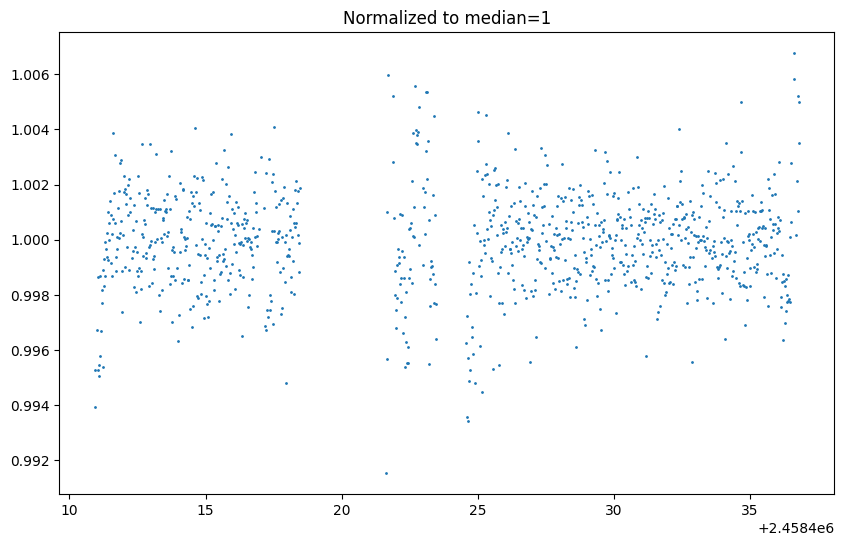

,time,flux,flux_err
0,2.458411e+06,0.995278,0.002276
1,2.458411e+06,0.993933,0.002254
2,2.458411e+06,0.996731,0.002259
3,2.458411e+06,0.998639,0.002259
4,2.458411e+06,0.995275,0.002252
...,...,...,...
988,2.458437e+06,1.002125,0.002256
989,2.458437e+06,1.005209,0.002277
990,2.458437e+06,1.001052,0.002298
991,2.458437e+06,1.003490,0.002320


In [4]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [5]:
df2csv(df, full_path[:-4]+"_p.csv")